# How to use TA-Lib to generate Alpha Factors

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Get Data

The `assets.h5` store can be generated using the the notebook [create_datasets](../../data/create_datasets.ipynb) in the [data](../../data) directory in the root directory of this repo for instruction to download the following dataset.

Set data store location:

We load the AAPL stock price for the 2007-10 using `pd.IndexSlice` to perform a slice operation on the `pd.MultiIndex`, select the adjusted close price and unpivot the column to convert the DataFrame to wide format with tickers in the columns and timestamps in the rows:

In [15]:
# Lire le DataFrame à partir d'un fichier HDF5
data = pd.read_hdf('../../data/data.h5', key='btc_usdt')

In [16]:
# Mettez la colonne 'timestamp' en index
data.set_index('timestamp', inplace=True)

# Ne gardez que les colonnes 'open', 'high', 'low', 'close'
data = data[['open', 'high', 'low', 'close']]

# Convertissez les colonnes en float
data = data.astype(float)

In [17]:
data.head()

,open,high,low,close
timestamp,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08
2017-08-18,4285.08,4371.52,3938.77,4108.37
2017-08-19,4108.37,4184.69,3850.00,4139.98
2017-08-20,4120.98,4211.08,4032.62,4086.29
2017-08-21,4069.13,4119.62,3911.79,4016.00


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2017-08-17 to 2024-06-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2481 non-null   float64
 1   high    2481 non-null   float64
 2   low     2481 non-null   float64
 3   close   2481 non-null   float64
dtypes: float64(4)
memory usage: 96.9 KB


## Compute Bollinger Bands

In [19]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

## Compute Relative Strength Index

In [20]:
rsi = RSI(data.close, timeperiod=14)

## Moving Average Convergence/Divergence

The MACD computes the difference between two Exponential Moving Averages (EMA), one longer- and one shorter-term.

The ta-lib MACD Indicator implementation has four inputs:
- the close price
- `fastperiod`: the short-term EMA period
- `slowperiod`: the long-term EMA period
- `signalperiod`: the period for the EMA of the MACD itself

It has three outputs:
- `macd` is the difference between the fast EMA and slow EMA.
- `macdsignal` is the EMA of the MACD value with period `signalperiod`
- `macdhist` computes the difference between `macd` and `macdsignal`

In [21]:
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

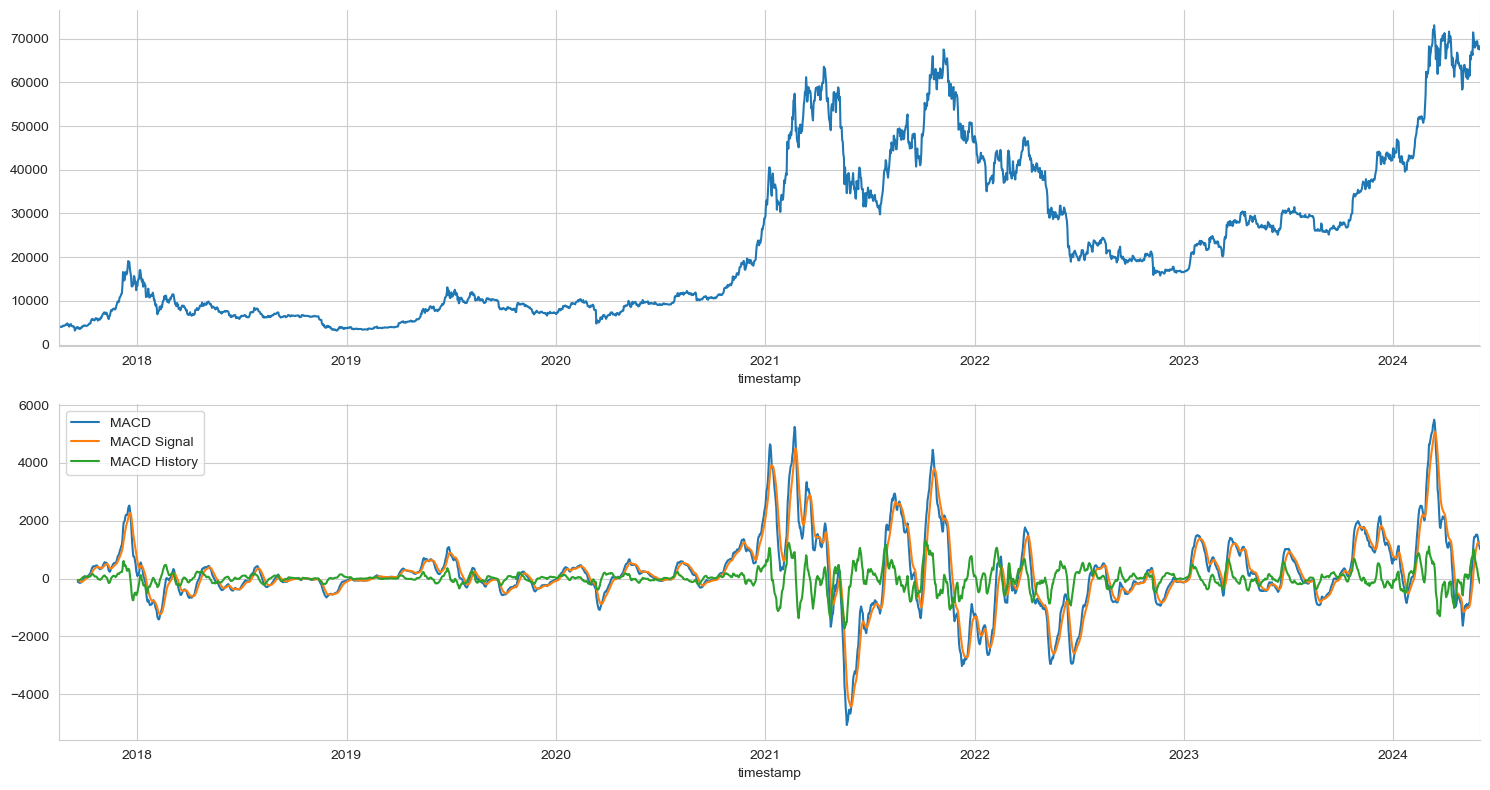

In [22]:
macd_data = pd.DataFrame({'AAPL': data.close, 'MACD': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data.AAPL.plot(ax=axes[0])
macd_data.drop('AAPL', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

## Plot Result

In [23]:
data = pd.DataFrame({'AAPL': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

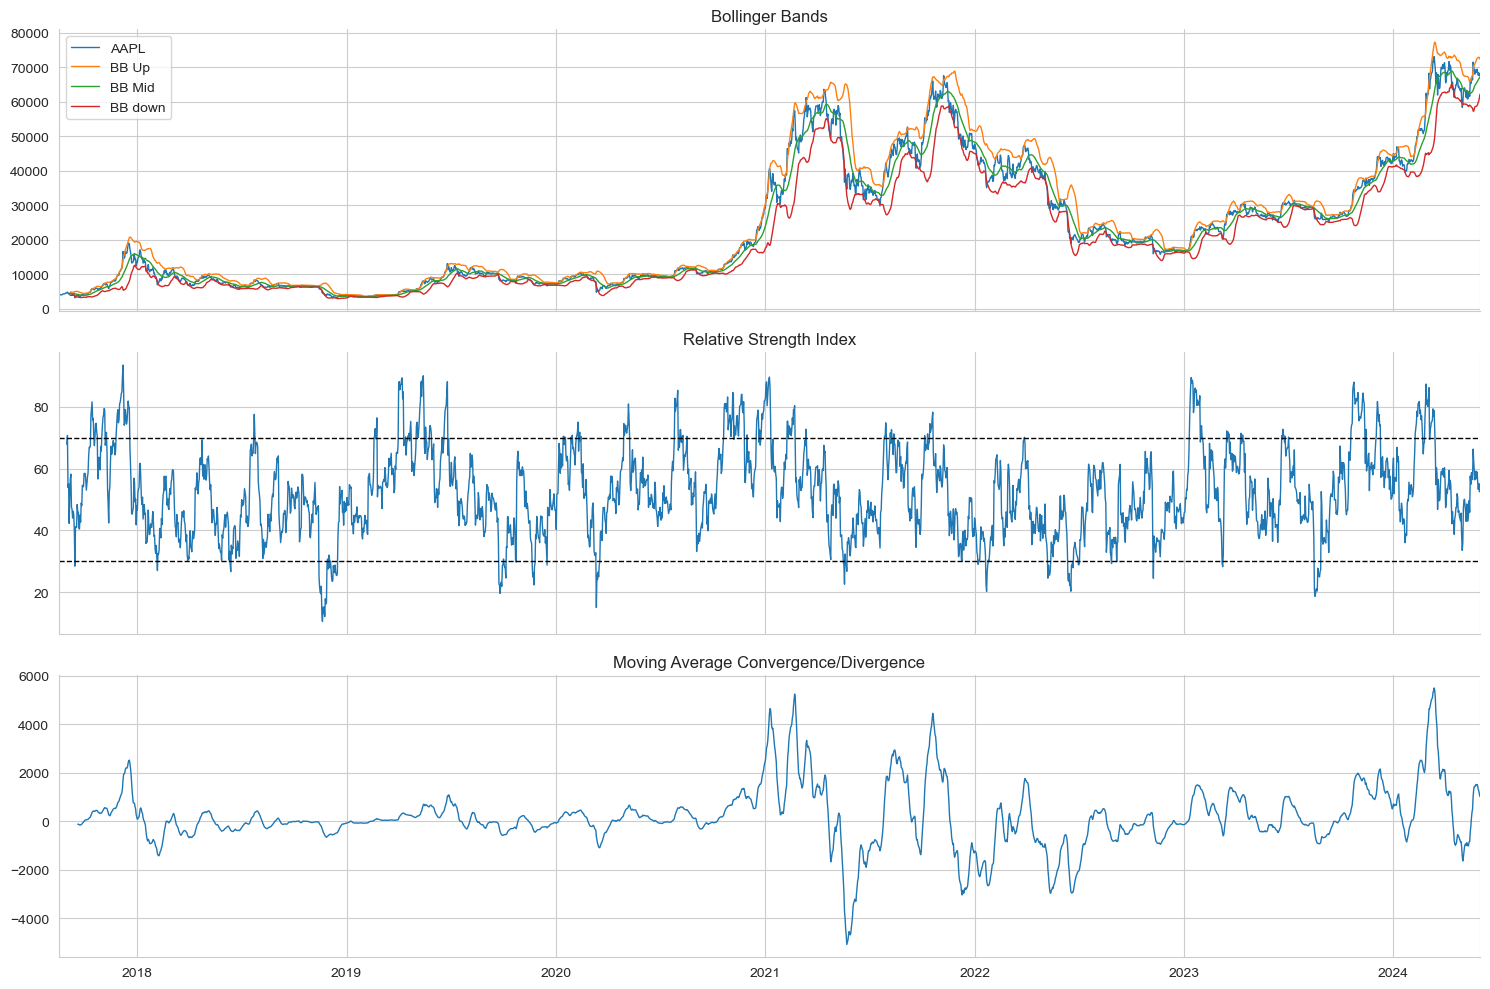

In [24]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();